<a href="https://colab.research.google.com/github/ChanikaKavindi/Identifying-Ayurvedic-Leaves-Classifier-/blob/main/Implementation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d ahilaprem/mepco-tropic-leaf

Dataset URL: https://www.kaggle.com/datasets/ahilaprem/mepco-tropic-leaf
License(s): unknown
100% 2.98G/2.99G [00:35<00:00, 188MB/s]
100% 2.99G/2.99G [00:35<00:00, 89.7MB/s]


In [4]:
!unzip -q mepco-tropic-leaf.zip

In [5]:
import os
import zipfile
import shutil

dataset_path = 'Clean_Ayurvedic_Dataset'
os.makedirs(dataset_path, exist_ok=True)

base_search_dir = '.'

for root, dirs, files in os.walk(base_search_dir):
    if 'spinach' in root and root.endswith('database'):
        source_spinach_dir = root
        for folder_name in os.listdir(source_spinach_dir):
            src_path = os.path.join(source_spinach_dir, folder_name)
            dest_path = os.path.join(dataset_path, folder_name)
            if os.path.isdir(src_path):
                shutil.copytree(src_path, dest_path, dirs_exist_ok=True)

    if 'MepcoTropicLeaf' in root and root.endswith('database') and 'spinach' not in root:
        source_mepco_dir = root
        for item in os.listdir(source_mepco_dir):
            if item.endswith('.zip'):
                class_name = item[:-4]
                zip_path = os.path.join(source_mepco_dir, item)
                extract_path = os.path.join(dataset_path, class_name)
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)

In [6]:
class_counts = {}

if os.path.exists(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            if count > 0:
                class_counts[class_name] = count

for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

In [7]:
import matplotlib.pyplot as plt

if class_counts:
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(classes, counts, color='steelblue', edgecolor='white')

    plt.xlabel('Ayurvedic Plant Category', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('MepcoTropicLeaf Class Distribution', fontsize=14)
    plt.xticks(range(len(classes)), classes, rotation=90, ha='center', fontsize=9)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

In [8]:
import os
import zipfile
import shutil

clean_dir = 'Clean_Ayurvedic_Dataset'
os.makedirs(clean_dir, exist_ok=True)

print("Searching your Colab environment for dataset files...")
images_moved = 0
zips_extracted = 0

for root, dirs, files in os.walk('.'):
    if clean_dir in root:
        continue

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            class_name = os.path.basename(root)
            dest_folder = os.path.join(clean_dir, class_name)
            os.makedirs(dest_folder, exist_ok=True)

            src_path = os.path.join(root, file)
            dest_path = os.path.join(dest_folder, file)

            if not os.path.exists(dest_path):
                shutil.copy(src_path, dest_path)
                images_moved += 1

    for file in files:
        if file.endswith('.zip') and file != 'mepco-tropic-leaf.zip':
            class_name = file.replace('.zip', '')
            dest_folder = os.path.join(clean_dir, class_name)

            if not os.path.exists(dest_folder) or len(os.listdir(dest_folder)) == 0:
                os.makedirs(dest_folder, exist_ok=True)
                zip_path = os.path.join(root, file)
                try:
                    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                        zip_ref.extractall(dest_folder)
                        zips_extracted += 1
                except zipfile.BadZipFile:
                    print(f"Warning: Failed to unzip {file}")

print(f"\n--- Rescue Operation Complete ---")
print(f"Individual images moved: {images_moved}")
print(f"Plant ZIP files extracted: {zips_extracted}")

classes_found = [d for d in os.listdir(clean_dir) if os.path.isdir(os.path.join(clean_dir, d))]
print(f"\nSUCCESS: Total plant classes ready in '{clean_dir}': {len(classes_found)}")

Searching your Colab environment for dataset files...

--- Rescue Operation Complete ---
Individual images moved: 6021
Plant ZIP files extracted: 0

SUCCESS: Total plant classes ready in 'Clean_Ayurvedic_Dataset': 75


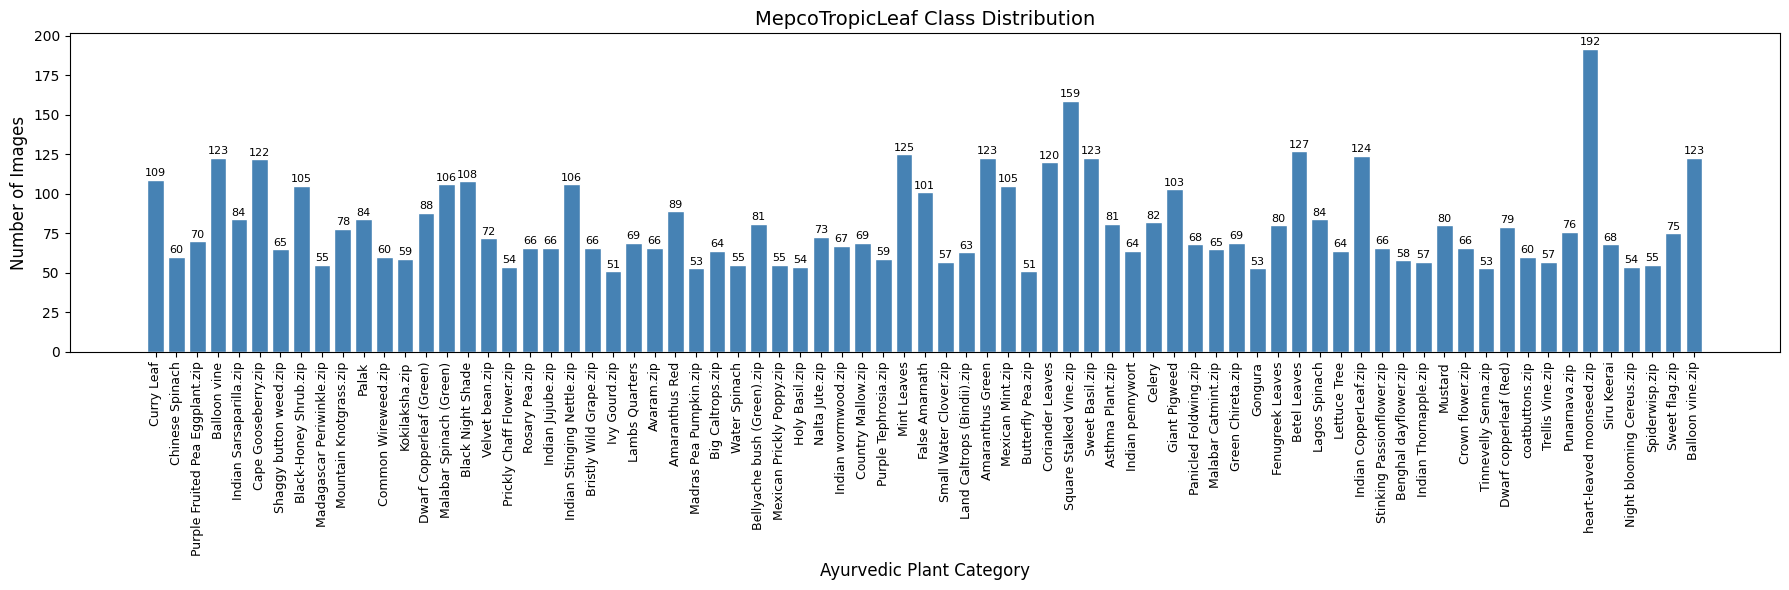

In [9]:
import os
import matplotlib.pyplot as plt

dataset_path = 'Clean_Ayurvedic_Dataset'
class_counts = {}

if os.path.exists(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            if count > 0:
                class_counts[class_name] = count

if class_counts:
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(classes, counts, color='steelblue', edgecolor='white')

    plt.xlabel('Ayurvedic Plant Category', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('MepcoTropicLeaf Class Distribution', fontsize=14)
    plt.xticks(range(len(classes)), classes, rotation=90, ha='center', fontsize=9)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("Error: No images found to plot. Ensure extraction was successful.")

Attempting to load dataset and create 'train_ds'...
Found 6021 files belonging to 75 classes.
Using 4817 files for training.

Successfully loaded 75 classes. Drawing images now...



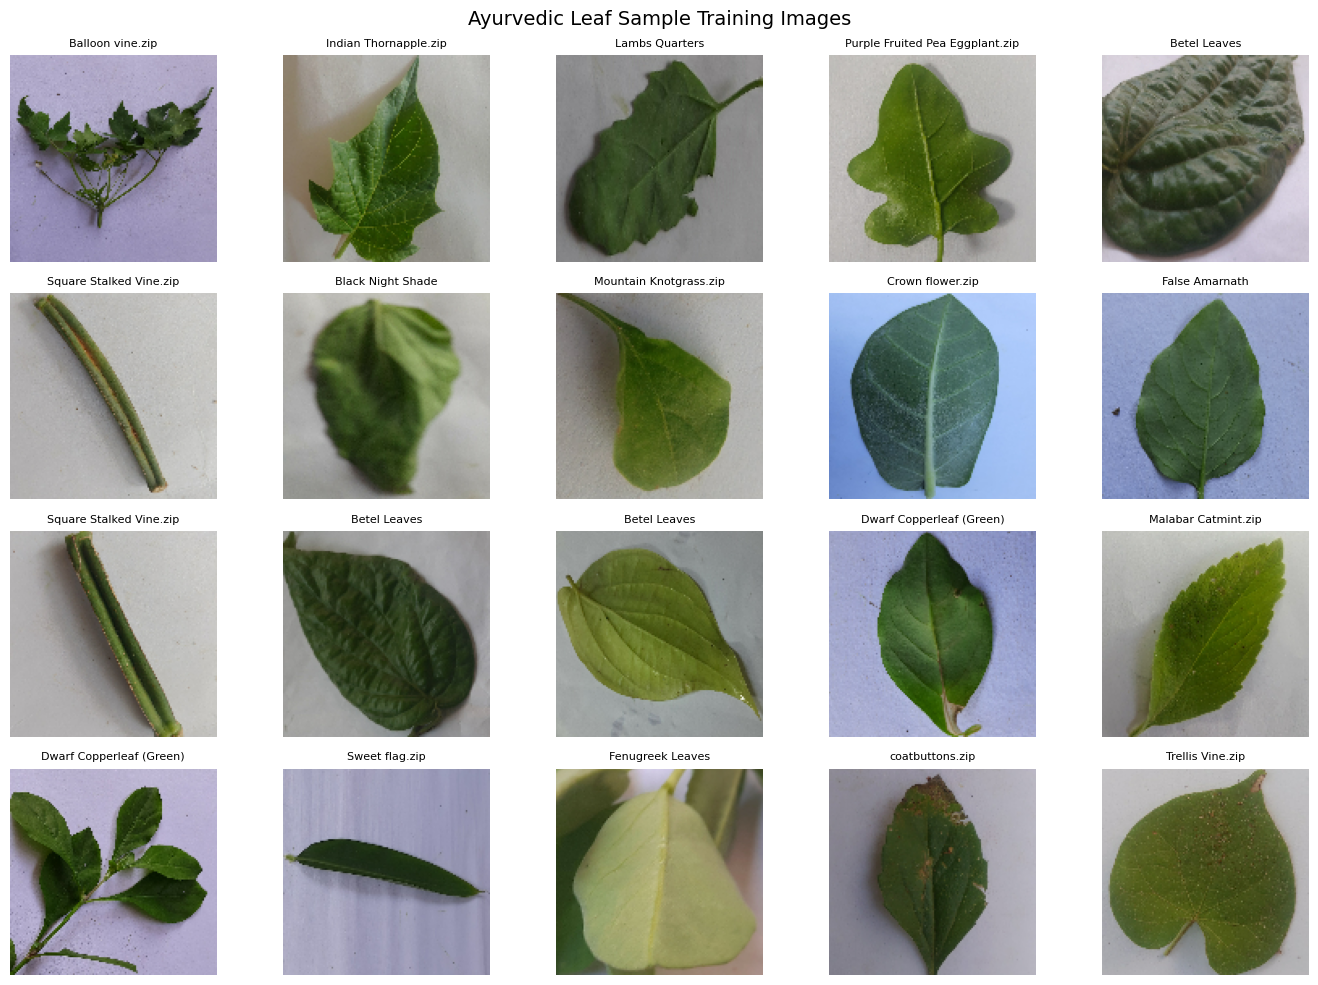

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

dataset_path = 'Clean_Ayurvedic_Dataset'
batch_size = 32
img_height = 128
img_width = 128

print("Attempting to load dataset and create 'train_ds'...")

try:
    train_ds = tf.keras.utils.image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    class_names = train_ds.class_names
    print(f"\nSuccessfully loaded {len(class_names)} classes. Drawing images now...\n")

    plt.figure(figsize=(14, 10))
    for images, labels in train_ds.take(1):
        for i in range(20):
            plt.subplot(4, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]], fontsize=8)
            plt.axis("off")

    plt.suptitle('Ayurvedic Leaf Sample Training Images', fontsize=14)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"\nERROR: {e}")
    print("WARNING: The dataset folder is still empty. You need to run the 'Search and Rescue' script from my previous message to extract the images first!")

In [11]:
import tensorflow as tf

dataset_path = 'Clean_Ayurvedic_Dataset'
batch_size = 32
img_height = 128
img_width = 128

print("1. Loading Training Dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print("\n2. Loading Validation Dataset...")
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print("\n3. Normalizing and Optimizing Datasets...")
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\nSuccess! Both train_ds and val_ds are completely ready for the model.")

1. Loading Training Dataset...
Found 6021 files belonging to 75 classes.
Using 4817 files for training.

2. Loading Validation Dataset...
Found 6021 files belonging to 75 classes.
Using 1204 files for validation.

3. Normalizing and Optimizing Datasets...

Success! Both train_ds and val_ds are completely ready for the model.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import shutil
import os

source_dir = 'Clean_Ayurvedic_Dataset'

drive_dir = '/content/drive/MyDrive/Clean_Ayurvedic_Dataset'

print("Checking Google Drive...")

if not os.path.exists(drive_dir):
    print("Copying dataset to Google Drive. This might take a few minutes, please wait...")
    shutil.copytree(source_dir, drive_dir)
    print("\nSuccess! Your dataset is permanently saved in your Google Drive.")
else:
    print("\nDataset already exists in your Google Drive! No need to copy again.")

Checking Google Drive...

Dataset already exists in your Google Drive! No need to copy again.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [15]:
DATASET_DIR = '/content/drive/MyDrive/Clean_Ayurvedic_Dataset'
IMG_SIZE = 128
BATCH_SIZE = 32

In [16]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [17]:
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 4848 images belonging to 75 classes.


In [18]:
validation_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1173 images belonging to 75 classes.


In [19]:
print("\n" + "="*50)
print("DATASET INFORMATION AFTER PREPROCESSING")
print("="*50)


DATASET INFORMATION AFTER PREPROCESSING


In [20]:
print("Training samples   :", train_generator.samples)
print("Validation samples :", validation_generator.samples)

print("\nNumber of classes :", train_generator.num_classes)

Training samples   : 4848
Validation samples : 1173

Number of classes : 75


In [21]:
images, labels = next(train_generator)

print("\nBatch Shape Verification")
print("="*50)
print("Image batch shape :", images.shape)
print("Label batch shape :", labels.shape)
print("Image data type   :", images.dtype)
print("Pixel range       :", images.min(), "to", images.max())


Batch Shape Verification
Image batch shape : (32, 128, 128, 3)
Label batch shape : (32, 75)
Image data type   : float32
Pixel range       : 0.0 to 1.0


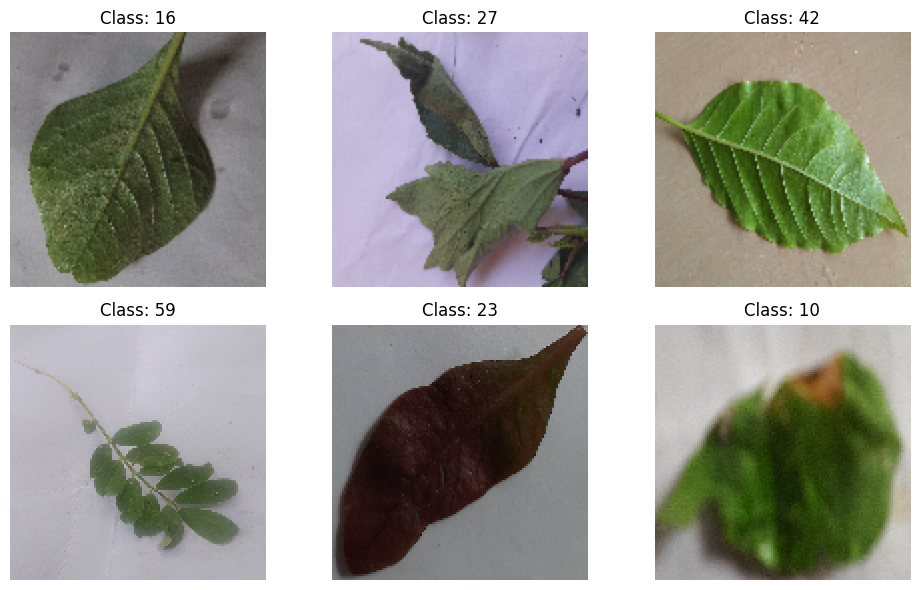

In [22]:
plt.figure(figsize=(10,6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = train_generator.num_classes

In [24]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,697,963 (33.18 MB)

 Trainable params: 8,696,555 (33.17 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [27]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1744s 11s/step - accuracy: 0.1914 - loss: 3.6234 - val_accuracy: 0.0222 - val_loss: 12.1553 - learning_rate: 0.0010
Epoch 2/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 564s 4s/step - accuracy: 0.5328 - loss: 1.7996 - val_accuracy: 0.0989 - val_loss: 5.7241 - learning_rate: 0.0010
Epoch 3/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 620s 4s/step - accuracy: 0.6565 - loss: 1.2952 - val_accuracy: 0.2106 - val_loss: 3.9354 - learning_rate: 0.0010
Epoch 4/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 551s 4s/step - accuracy: 0.7620 - loss: 0.8983 - val_accuracy: 0.2174 - val_loss: 4.4813 - learning_rate: 0.0010
Epoch 5/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.7884 - loss: 0.7771 - val_accuracy: 0.2882 - val_loss: 3.9273 - learning_rate: 0.0010
Epoch 6/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 553s 4s/step - accuracy: 0.8271 - loss: 0.5917 - val_accuracy: 0.2779 - val_loss: 4.5661 - learning_rate: 0.0010
Epoch 7/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 569s 4s/step - accuracy: 0.8782 - loss:

In [28]:
print(f'\nTraining stopped at epoch {len(history.history["accuracy"])}')
print(f'Best val accuracy: {max(history.history["val_accuracy"]):.4f}')


Training stopped at epoch 15
Best val accuracy: 0.6300


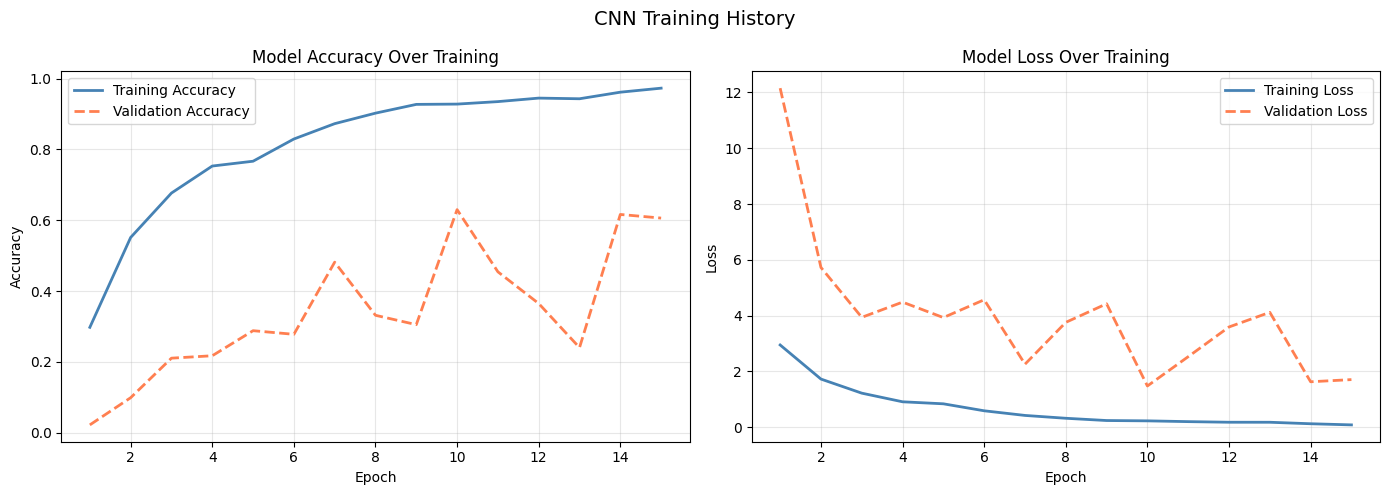

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
epochs_ran = range(1, len(history.history['accuracy']) + 1)

ax1.plot(epochs_ran, history.history['accuracy'], label='Training Accuracy', linewidth=2, color='steelblue')
ax1.plot(epochs_ran, history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='coral', linestyle='--')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Over Training')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(epochs_ran, history.history['loss'], label='Training Loss', linewidth=2, color='steelblue')
ax2.plot(epochs_ran, history.history['val_loss'], label='Validation Loss', linewidth=2, color='coral', linestyle='--')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss Over Training')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('CNN Training History', fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Overall Test Accuracy: {test_acc:.4f}")
print(f"Overall Test Loss: {test_loss:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5901 - loss: 1.5273
Overall Test Accuracy: 0.6300
Overall Test Loss: 1.4737


In [33]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step


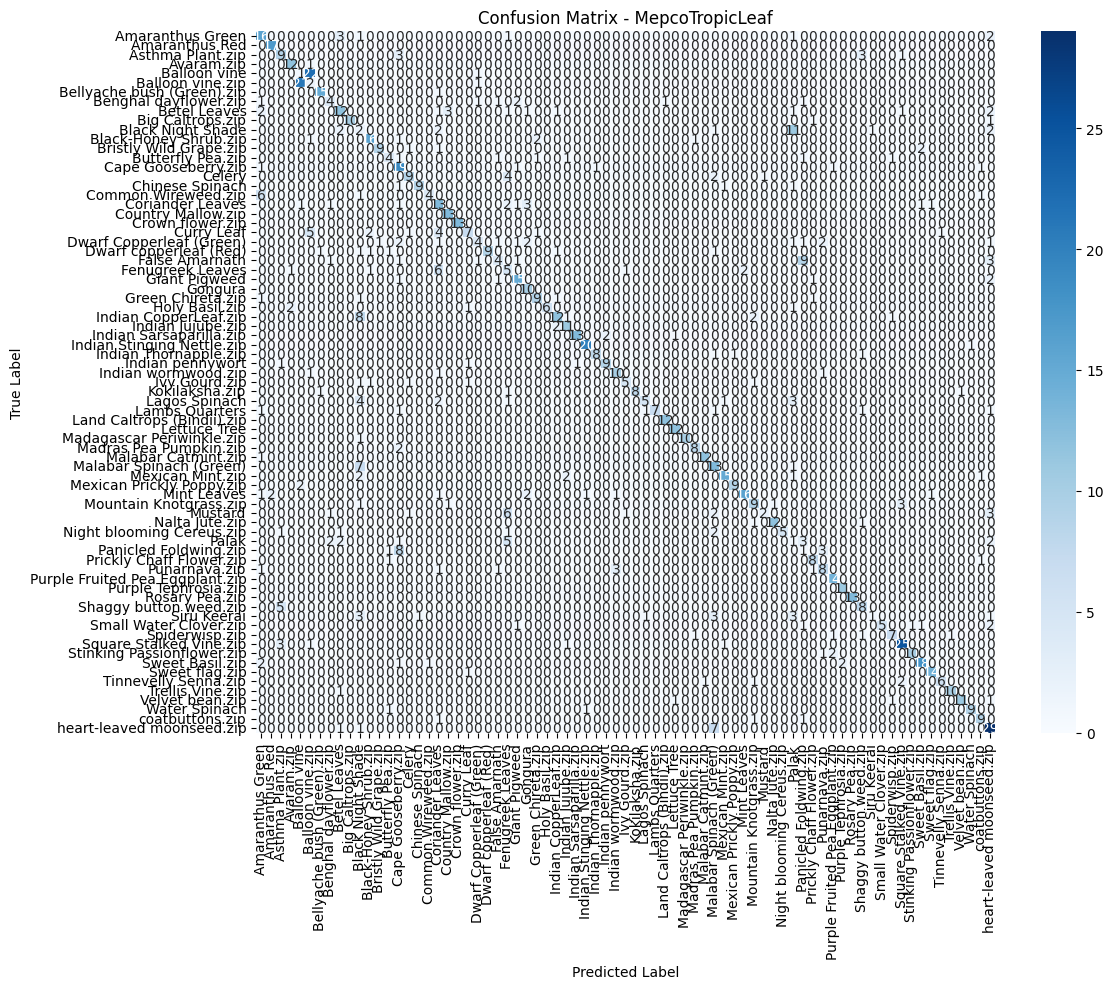

In [34]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - MepcoTropicLeaf')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [39]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                 precision    recall  f1-score   support

               Amaranthus Green       0.48      0.67      0.56        24
                 Amaranthus Red       0.89      1.00      0.94        17
               Asthma Plant.zip       0.47      0.56      0.51        16
                     Avaram.zip       0.80      0.92      0.86        13
                   Balloon vine       0.04      0.04      0.04        24
               Balloon vine.zip       0.06      0.08      0.07        24
     Bellyache bush (Green).zip       0.88      0.94      0.91        16
          Benghal dayflower.zip       0.44      0.36      0.40        11
                   Betel Leaves       0.55      0.48      0.51        25
               Big Caltrops.zip       1.00      0.83      0.91        12
              Black Night Shade       0.06      0.10      0.07        21
          Black-Honey Shrub.zip       0.76      0.76      0.76        21
         Bristly Wild Grape.zip       0.90      0.

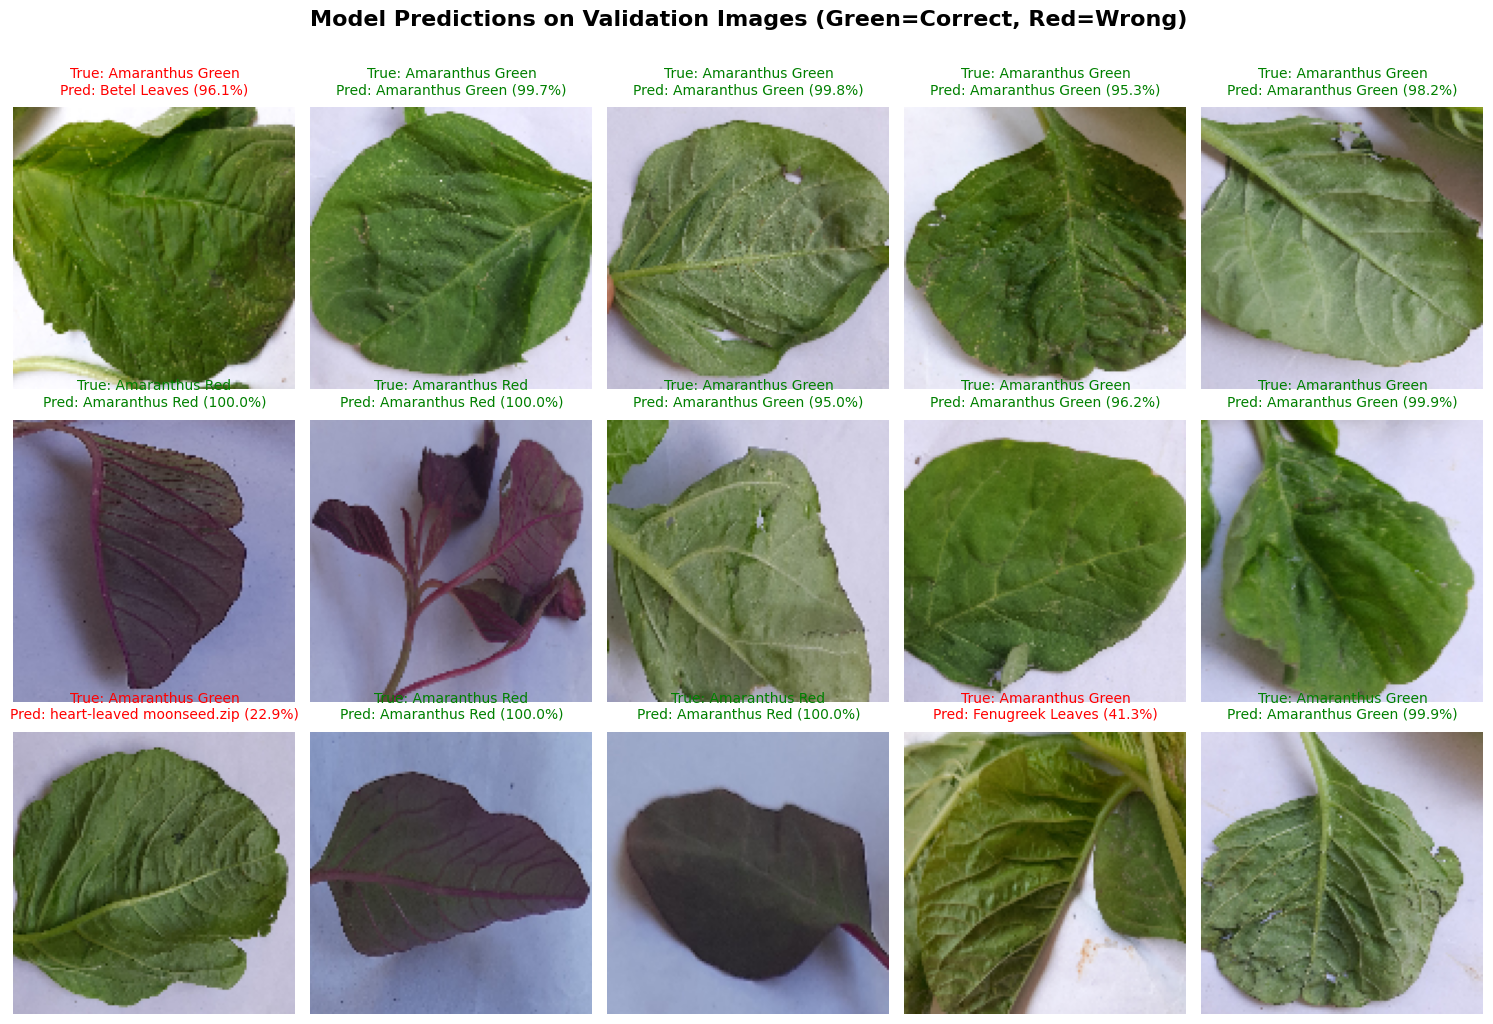

In [41]:
import numpy as np
import matplotlib.pyplot as plt

validation_generator.reset()
images, labels = next(validation_generator)

batch_predictions = model.predict(images, verbose=0)
class_labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(15, 10))

num_images = 15
random_indices = np.random.choice(images.shape[0], num_images, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i + 1)

    plt.imshow(images[idx])

    true_idx = np.argmax(labels[idx])
    pred_idx = np.argmax(batch_predictions[idx])

    true_label = class_labels[true_idx]
    pred_label = class_labels[pred_idx]
    confidence = batch_predictions[idx][pred_idx] * 100

    color = 'green' if true_label == pred_label else 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)",
              fontsize=10, color=color, pad=10)
    plt.axis('off')

plt.suptitle('Model Predictions on Validation Images (Green=Correct, Red=Wrong)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

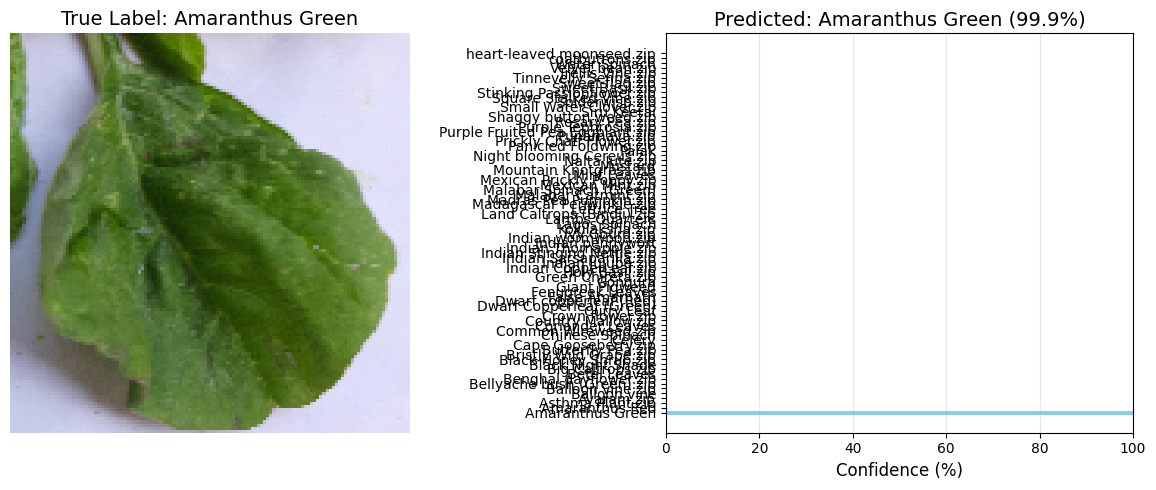


Top 3 Predictions:
Amaranthus Green: 99.93%
heart-leaved moonseed.zip: 0.04%
Stinking Passionflower.zip: 0.01%


In [42]:
import numpy as np
import matplotlib.pyplot as plt

def predict_single_image_from_generator():
    validation_generator.reset()
    images, labels = next(validation_generator)

    image_index = np.random.randint(0, images.shape[0])
    image = images[image_index]

    class_names = list(validation_generator.class_indices.keys())
    true_label_idx = np.argmax(labels[image_index])
    true_class_name = class_names[true_label_idx]

    image_input = np.expand_dims(image, axis=0)

    probabilities = model.predict(image_input, verbose=0)[0]
    predicted_class_idx = np.argmax(probabilities)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"True Label: {true_class_name}", fontsize=14)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.barh(class_names, probabilities * 100, color='skyblue')
    plt.xlabel("Confidence (%)", fontsize=12)
    plt.title(
        f"Predicted: {class_names[predicted_class_idx]} "
        f"({probabilities[predicted_class_idx]*100:.1f}%)",
        fontsize=14
    )
    plt.xlim(0, 100)
    plt.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()

    return class_names, probabilities

class_names, probs = predict_single_image_from_generator()

print("\nTop 3 Predictions:")
top_3_indices = np.argsort(probs)[-3:][::-1]
for idx in top_3_indices:
    print(f"{class_names[idx]}: {probs[idx]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


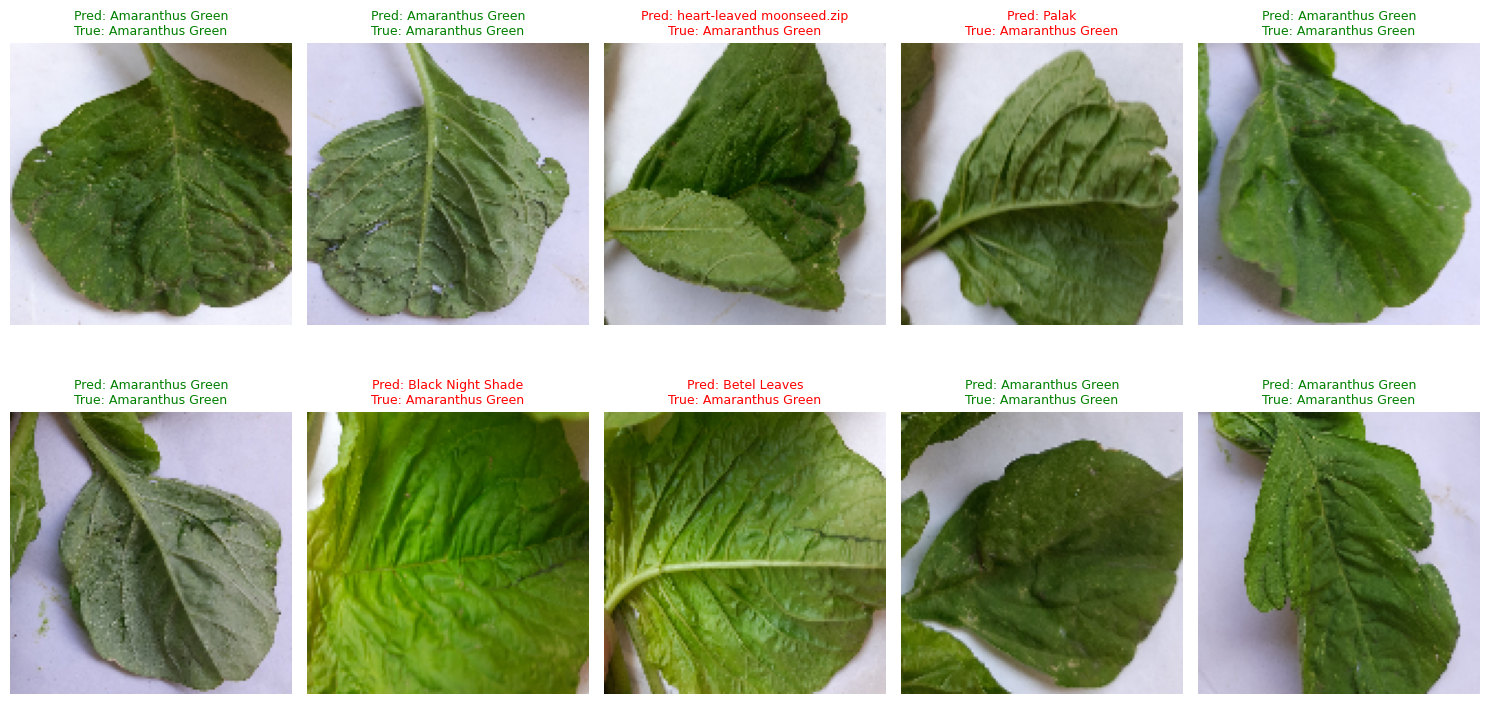

In [43]:
validation_generator.reset()
images, labels = next(validation_generator)
sample_preds = model.predict(images)

pred_classes_batch = np.argmax(sample_preds, axis=1)
true_classes_batch = np.argmax(labels, axis=1)

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])

    is_correct = pred_classes_batch[i] == true_classes_batch[i]
    color = 'green' if is_correct else 'red'

    pred_label = class_labels[pred_classes_batch[i]]
    true_label = class_labels[true_classes_batch[i]]

    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()